In [1]:
# Step 1: Import all the necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

print("Libraries imported successfully.")

# Step 2: Define the paths to your dataset directories
base_dir = os.path.join('datasets', 'classifier_data')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Step 3: Set up image parameters
IMG_WIDTH = 80
IMG_HEIGHT = 80
BATCH_SIZE = 32

# Step 4: Create ImageDataGenerator for training with data augmentation
# Data augmentation creates new training samples from the existing ones by applying random transformations.
# This helps the model generalize better and reduces overfitting.
train_datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize pixel values to be between 0 and 1
    rotation_range=20,   # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2, # Randomly shift images horizontally
    height_shift_range=0.2,# Randomly shift images vertically
    shear_range=0.2,     # Apply shear transformations
    zoom_range=0.2,      # Randomly zoom in on images
    horizontal_flip=True,# Randomly flip images horizontally
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

# For validation and test data, we only need to rescale the pixel values.
# We don't apply augmentation here because we want to evaluate the model on the original, unaltered images.
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Step 5: Create data generators that will feed images to the model
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    color_mode='grayscale'     # Use grayscale to simplify the model
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale'
)

# Let's print the class indices to confirm
print("\nClass indices found by the generator:")
print(train_generator.class_indices)

Libraries imported successfully.
Found 2037 images belonging to 4 classes.
Found 432 images belonging to 4 classes.

Class indices found by the generator:
{'Closed': 0, 'Open': 1, 'no_yawn': 2, 'yawn': 3}


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 1: Define the model architecture
model = Sequential([
    # First convolutional block
    # Conv2D applies filters to the image to find patterns.
    # 32 filters, 3x3 kernel size, 'relu' activation for non-linearity.
    # input_shape must match our image dimensions (80x80) and color channels (1 for grayscale).
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    # MaxPooling2D downsamples the image, keeping the most important features.
    MaxPooling2D(2, 2),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the 3D feature maps into a 1D vector to feed into the dense layers.
    Flatten(),
    
    # A Dense layer is a classic fully-connected neural network layer.
    Dense(512, activation='relu'),
    
    # Dropout is a regularization technique to prevent overfitting.
    # It randomly sets 50% of the input units to 0 at each update during training.
    Dropout(0.5),
    
    # The final output layer. It must have 4 neurons (one for each class).
    # 'softmax' activation is used for multi-class classification, as it outputs a probability distribution.
    Dense(4, activation='softmax')
])

# Step 2: Print the model summary
# This is a great way to see the architecture of your model and the number of parameters.
model.summary()

C:\Users\acer\anaconda3\envs\drowsiness_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 78, 78, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 39, 39, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,289,540 (16.36 MB)

 Trainable params: 4,289,540 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Step 1: Compile the model with an optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 2: Print a confirmation message
print("Model compiled successfully and is ready for training.")

Model compiled successfully and is ready for training.


In [4]:
# Define how many epochs to train for
EPOCHS = 20

print("Starting model training...")

# Train the model using the .fit() method
# We pass it the training data, the number of epochs, and the validation data.
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

print("\nModel training complete!")

Starting model training...


C:\Users\acer\anaconda3\envs\drowsiness_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.3974 - loss: 1.2382

C:\Users\acer\anaconda3\envs\drowsiness_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 35s 450ms/step - accuracy: 0.3992 - loss: 1.2359 - val_accuracy: 0.7245 - val_loss: 0.7080
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 427ms/step - accuracy: 0.6515 - loss: 0.7868 - val_accuracy: 0.8542 - val_loss: 0.4288
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 431ms/step - accuracy: 0.7172 - loss: 0.6574 - val_accuracy: 0.8611 - val_loss: 0.3690
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 442ms/step - accuracy: 0.7294 - loss: 0.6103 - val_accuracy: 0.8542 - val_loss: 0.3888
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 441ms/step - accuracy: 0.7816 - loss: 0.5451 - val_accuracy: 0.8866 - val_loss: 0.2769
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 428ms/step - accuracy: 0.7852 - loss: 0.5158 - val_accuracy: 0.9282 - val_loss: 0.2198
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 430ms/step - accuracy: 0.8190 - loss: 0.4594 - val_accuracy: 0.9074 - val_loss: 0.2444
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 425ms/step - accuracy: 0.8345 - loss: 0.4046 - val_accuracy: 0.942

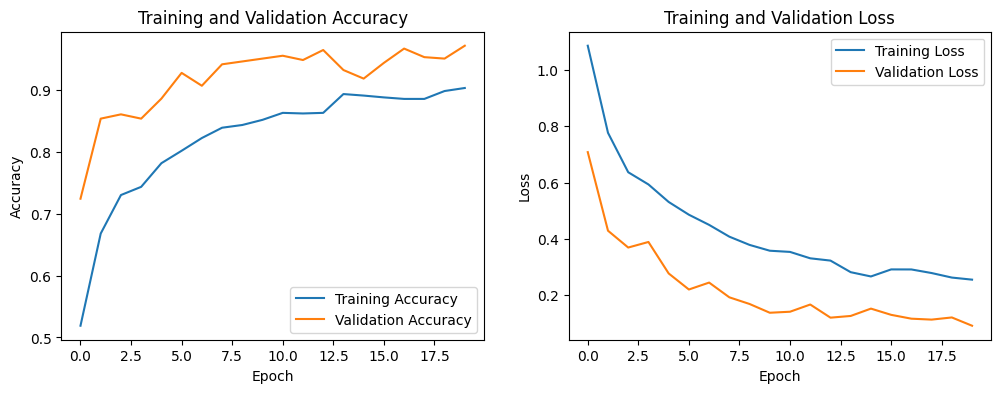

In [5]:
import matplotlib.pyplot as plt

# --- Plotting Accuracy ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# --- Plotting Loss ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [6]:
# Create a data generator for the test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False) # It's good practice to not shuffle test data

# Evaluate the model on the test data
print("\nEvaluating the model on the test set...")
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

Found 432 images belonging to 4 classes.

Evaluating the model on the test set...
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.9945 - loss: 0.0506

Test Accuracy: 98.38%
Test Loss: 0.07989683747291565


In [7]:
# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('drowsiness_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("\nModel saved successfully as 'drowsiness_model.tflite'")

INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpkdfqt71q\assets


INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmpkdfqt71q\assets


Saved artifact at 'C:\Users\acer\AppData\Local\Temp\tmpkdfqt71q'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 80, 80, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2083439692080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2083439690848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2083439749248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2083439749072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2083439751008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2083442339904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2083442342192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2083442342016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2083442343776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2083442364656: TensorSpec(shape=(), dtype=tf.resource, name=None)

Model sav